## Mission 1. Netfilx and Code
---
호주니는 요즘 넷플릭스를 보는데 심취해있다. 최근 넷플릭스와 협업하는 K-Contents가 늘어가는 것을 보면서 자부심을 느끼는 한편, 넷플릭스에 얼마나 많은 한국 작품이 있는지 궁금해졌다. 호주니를 도와 넷플릭스에 얼마나 많은 한국 작품이 있는지 알아보자.

### Mandatory Part
---
넷플릭스 데이터가 주어졌을 때, 다음 질문에 답하시오:
- 한국 작품은 총 얼마나 있는가?
    - country column을 기준으로 한다.
    - "South Korea"인 경우만 인정한다. ("US, South Korea"는 인정하지 않음)

In [134]:
import numpy as np
import pandas as pd

netflix = pd.read_csv("./netflix_titles.csv")
korean_show = netflix[netflix['country'] == 'South Korea']
print(f"한국 작품은 총 {len(korean_show)}개 있습니다.")

한국 작품은 총 183개 있습니다.


생각보다 많은 작품이 있었음에 놀란 호주니는 K-콘텐츠를 넘어 글로벌 콘텐츠에 관심을 가지게 되었다. 이 과정에서 가장 많은 콘텐츠가 있는 국가는 어디일지 궁금해졌다. 호주니를 도와 이번에는 넷플릭스에서 가장 많은 작품을 만든 나라가 어디이고, 얼마나 많은 작품을 produce했는지 알아보자.

### Bonus Part
---
넷플릭스 데이터가 주어졌을 때, 다음 질문에 답하시오:
- 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?
    - country column을 기준으로 한다.
    - 단일 국가인 경우를 기준으로 결과를 구해보자.

In [138]:
netflix = pd.read_csv("./netflix_titles.csv")
# country가 NaN인 행 삭제
netflix = netflix.dropna(subset=['country'])
# country안에 ,가 있으면 단일 국가가 아니므로 해당 조건에 해당하는 행은 삭제
delete_con = netflix[netflix['country'].str.contains(',')].index
single_country = netflix.drop(delete_con)
netflix_by_sc = single_country['country'].groupby(by=single_country['country']).count()
netflix_by_sc[netflix_by_sc == max(netflix_by_sc)]
print(f"가장 많은 작품이 올라간 국가는 {netflix_by_sc[netflix_by_sc == max(netflix_by_sc)].index[0]}이고, 총 {max(netflix_by_sc)}개의 작품이 있습니다.")
# 구글링하면서 하다보니까 너무 복잡하게 해결한 것 같습니다... 도와주세요

가장 많은 작품이 올라간 국가는 United States이고, 총 2555개의 작품이 있습니다.


## Mission 2. 가즈아!
---
서울의 소시민 나일론 마스크는 요즘 가상화폐에 푹 빠져있다. 매일매일 극락과 지옥을 오가는 매운맛에 정신을 못 차리고 있는데, 그의 친구인 호주니는 그에게 정신차리게 하기 위해 비트코인 광풍이 일었던 2017년 한 해의 가격의 변화를 보여주려고 한다. 그런데 매일매일의 데이터를 보여주는 것보다 이것의 추세를 표현해주면 좋겠다는 생각이 들어 Moving Average(이동평균법) 를 도입하고자 한다. 호주니를 도와 마스크씨를 설득해보자.

### Mandatory Part
---
다음 데이터가 주어졌을 때 2016.6 ~ 2017.6 기간의 5-MA(Moving Average) 비트코인 가격 그래프를 그려주세요.
- 선의 색깔은 노란색(#f2a900) 으로 해야합니다.
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 Open Column으로 계산합니다.
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

이동평균(Moving Average)법은 시계열 데이터를 표현하는 데에 많이 사용하는 방법 중 하나입니다.

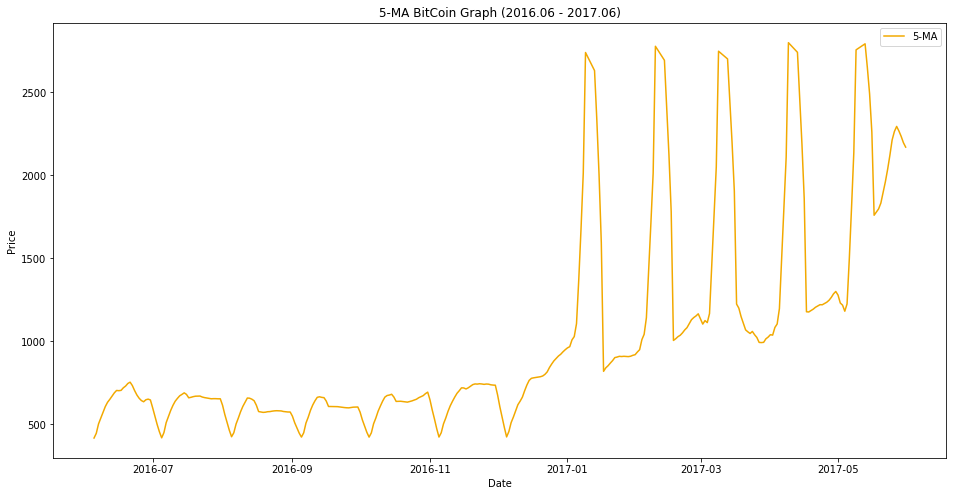

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

bitcoin = pd.read_csv('./BitCoin.csv')
bitcoin = bitcoin[['Date', 'Open']]
bitcoin = bitcoin[bitcoin['Date'].between('2016-06', '2017-06')]
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])
bitcoin = bitcoin.sort_values(by=['Date'])
mov5 = bitcoin['Open'].rolling(5).mean()
plt.figure(figsize = (16, 8))
plt.plot(bitcoin['Date'], mov5, label='5-MA', color='#f2a900')
plt.title("5-MA BitCoin Graph (2016.06 - 2017.06)")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()

해당 그래프를 본 나일론 마스크씨는 정신을 차렸다. 정확히는 비트코인만 바라본 본인을 말이다. 정말 많은 가상화폐가 있는데 비트코인만 바라본 본인을 돌아보게 되었다. 더불어 가장 핫한 코인인 이더리움 또한 관심이 생겼는데, 마스크씨는 2017년 한 해에 이 두개의 추세를 비교하고싶어한다. 마스크씨를 도와 비트코인과 이더리움의 가격 추세 비교를 도와주자.

### Bonus Part
---
위에 주어진 데이터와 더불어 다음 데이터도 주어졌을 때, 2016.6 ~ 2017.6 기간에 해당하는 비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프를 동시에 그려주세요.
- 선의 색깔은 비트코인 : 노란색(#f2a900), 이더리움 : 검은색(#3c3c3d) 으로 해야합니다.
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 Open Column으로 계산합니다.
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

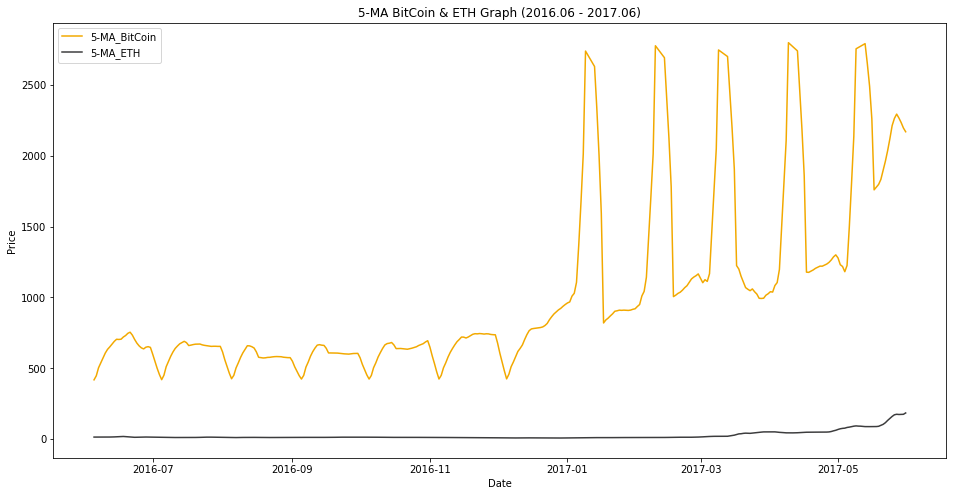

In [109]:
eth = pd.read_csv('./ETH_day.csv')
eth = eth[['Date', 'Open']]
eth = eth[eth['Date'].between('2016-06', '2017-06')]
eth['Date'] = pd.to_datetime(eth['Date'])
eth = eth.sort_values(by=['Date'])
mov5_eth = eth['Open'].rolling(5).mean()
plt.figure(figsize = (16, 8))
plt.plot(bitcoin['Date'], mov5, label='5-MA_BitCoin', color='#f2a900')
plt.plot(eth['Date'], mov5_eth, label='5-MA_ETH', color='#3c3c3d')
plt.title("5-MA BitCoin & ETH Graph (2016.06 - 2017.06)")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()